In [23]:
from IPython.core.display import HTML
def css_styling():
    styles = open("D:\Ipython Notebooks/styles/custom_working.css", "r").read()
    return HTML(styles)
css_styling()

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Moment Of Inertia Lab Calculations #

Here calculations are presented that will make the analysis of the moment of inertia laboratory easier.  In particular a discussion of the error and the correction to the moment of inertial is presented.  

In [8]:
import numpy as np
from __future__ import division
from sympy import *
# Variables for calculation

I, M, m, r, a, g, al, Mp, R= symbols('I M m r a g al Mp R')

# Define function Variables to be Used


# Varibles for Units

m, kg, sec, N , J, C, eV, Amp, Tesla, rad = symbols('m kg sec N J C eV Amp Tesla rad')
# Varibies for iteration

k, m, n = symbols('k m n', integer=True)
f, h = symbols('f h', cls=Function)

# Tell Sympy that we would like to see a nice ouput for our data

init_printing(use_unicode=True)

First we will define all that variables that we wish to use for the calculation.  Note that all of the variables are given units (which are themselves variables).  This allows us to do simple calculations with units a very cool deal indeed.  Please note also that each of the varibles are labeled with descriptions of thier use.  We define I as the moment of Inertial of the object, M as the mass of that object, R as the radius of that object, m as the haning mass, a as the tangential acceleration, g as gravity, and al as $ \alpha $ the angular acceleration. The inertia of the system can be estimated by the following equation.


$$ I = - \frac{r^{2}}{a} \left(a m + g \left(Mp - m\right)\right) $$

We start by evaluating this equation symbolicaly so that we can evaluate it numerically:

In [9]:
I = ((r**2)*(g*(m-Mp)-a*(m))/a)
simplify(I)

Now we define the variables to be used with the correct units as: 

    D = (11.37*10**-2)*m   # Diameter of the large disk (m)

    d = (2.57*10**-2)*m    # diameter of the inner radius of the string pulley (m)

    mh = (0.1049)*(kg)     # Haning Mass (kg)

    MD = (1.427 )*(kg)     # Mas of the Disk (kg)

    MP = (3.5*10**-2)*(kg) # Mass of the paper clips (kg)

    g0 = (9.81)*m/(sec**2) # acceleration of gravity (m/s^2)

    Tn = mh*g              # Tension in the String to create the torque (N*m)

    aT = .0169*(m/sec**2)  # This is the tangential accelration as measured by the program (m\s^2)

In [10]:
D = (11.37*10**-2)*m   # Diameter of the large disk (m)
De = (.01*10**-2)*m    # Error in the diameter of the disk [m]
d = (2.57*10**-2)*m    # diameter of the inner radius of the string pulley (m)
mh = (0.1049)*(kg)     # Haning Mass (kg)
MD = (1.427 )*(kg)     # Mas of the Disk (kg)
MP = (3.5*10**-2)*(kg) # Mass of the paper clips (kg)
g0 = (9.81)*m/(sec**2) # acceleration of gravity (m/s^2)
Tn = mh*g              # Tension in the String to create the torque (N*m)
aT = .0169*(m/sec**2)  # This is the tangential accelration as measured by the program (m\s^2)
Iex = 0                # Is the moment of inertia experimentally determined
IT = 0                 # Is the Theoretical  value for the moment of intertia

The previous result is evaluated with the above numerical values. The numerical result is: 

In [11]:
Ith = I.subs({r:d/2, m:mh, M:MD, Mp:MP, g:g0, a:aT}); Ith.evalf(3)

Now the calculation of the theroretical value must be done.  The equation that relates the angular acceleration and the linear acceleration is:

$$ {\alpha} = \frac{2}{d}{a_{tan}}  $$

the result of this calculation is:

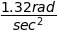

In [12]:
alpha = (2/d)*aT*rad
alpha.evalf(3)    

Now we must calculat the theoretical value of the moment of intertia $$I_{theory} = \frac{1}{2}{M}{R^2}$$ as:

In [13]:
IT = (M*(R)**2)/2;IT = IT.subs({M:MD, R:(D)});print(IT.evalf(3))

0.00922*kg*m**2


Now we will calculate the percent error as: $ (Theory - Experiemnt)*100/ (Theory) $  

In [14]:
per = 100*(IT-Ith)/IT;per.evalf(3)

We must now calculate the error in the experimental value given errors associated with our results listed in the table above.

In [15]:
#I = ((r**2)*(g*(m-Mp)-a*(m))/a)
diff(I, r).evalf(3)

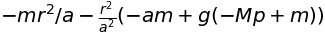

In [16]:
diff(I,a)

In [17]:
diff(I, Mp)

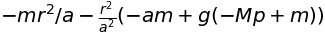

In [18]:
diff(I,a)

In [20]:
EI = (((diff(I,a))**2)*.01+((diff(I, Mp))**2)*.01+((diff(I,a)**2)*.01))**(1/2)

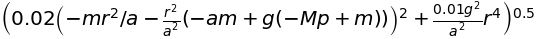

In [21]:
EI